In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataFrame = pd.read_excel("merc.xlsx")

In [38]:
#İlk 5 veriyi görebiliriz.
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [39]:
#Elimizdeki veri seti hakkında genel olarak bir bilgi sahibi olabiliriz.
dataFrame.describe() 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [40]:
#Veri setinde null eleman var mı diye kontrol edilebilir.
dataFrame.isna().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Bazı Grafiksel Analizler

<Axes: xlabel='price', ylabel='Count'>

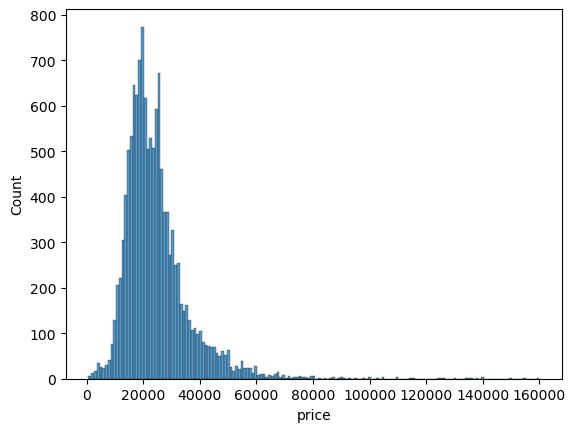

In [41]:
sns.histplot(dataFrame["price"])

<Axes: xlabel='year', ylabel='count'>

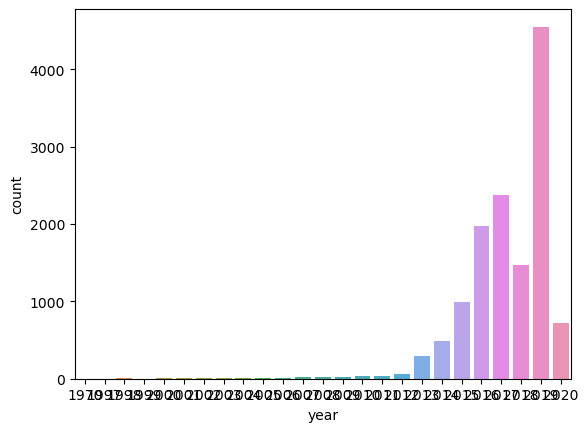

In [42]:
sns.countplot(x=dataFrame["year"])
#Eldeki verilerin güncel olduğunu gösterir.

In [43]:
#Bir arabanın fiyatını en çok hangi yılda üretildiği etkiler diyebiliriz. Korelasyona bakarak yorum yaptık.
dataFrame.corr()["price"].sort_values()

/var/folders/l4/pchdf7b10cs1t5kx4kd2j97h0000gn/T/ipykernel_37528/1815274598.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

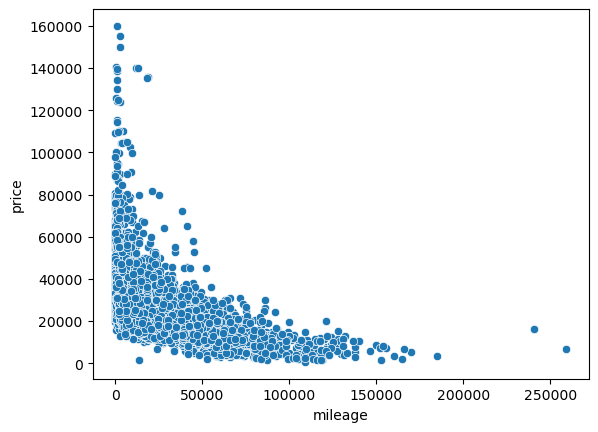

In [44]:
sns.scatterplot(x="mileage",y="price",data=dataFrame)
#Bu grafik sayesinde de kat edilen yol ne kadar fazla ise fiyat o kadar düşer. Bir üstteki korelasyonun tutarlı olduğunu 
#gösterir.

## Model oluşturmadan önce 

 Yukarıdaki grafiklerden de anlaşılabileceği üzere aykırı bazı veriler var. Fiyatı çok yüksek olan verileri temizleyelim.


In [45]:
dataFrame.sort_values("price", ascending= False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [46]:
len(dataFrame) * 0.01 #Elimizdeki verinin %99'u ile çalışacağız. %1'ini (131 veri) siliyoruz.

131.19

In [47]:
newDataFrame = dataFrame.sort_values("price", ascending= False).iloc[131:]

<Axes: xlabel='price', ylabel='Count'>

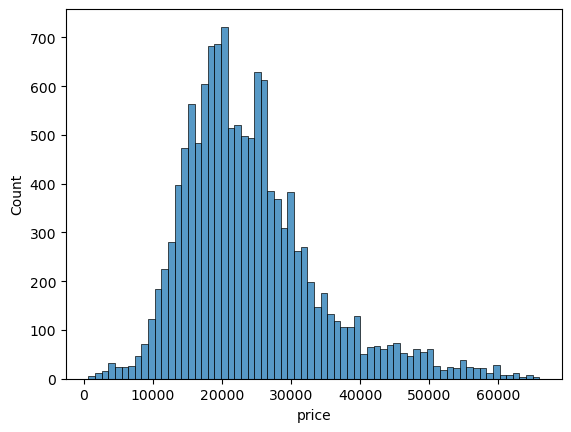

In [48]:
sns.histplot(newDataFrame["price"])

In [49]:
newDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [50]:
dataFrame = newDataFrame

In [51]:
dataFrame.groupby("year").mean()["price"]

/var/folders/l4/pchdf7b10cs1t5kx4kd2j97h0000gn/T/ipykernel_37528/2092793654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [52]:
#Verilerin daha iyi hale geldiği söylenebilir. Fakat 1970 yılını da sileceğim.
dataFrame = dataFrame[dataFrame.year != 1970]

In [53]:
dataFrame.groupby("year").mean()["price"]

/var/folders/l4/pchdf7b10cs1t5kx4kd2j97h0000gn/T/ipykernel_37528/2092793654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

Son olarak model eğitiminde herhangi bir faydası olacağını düşünmediğim için "transmission" sütununu siliyorum.

In [54]:
dataFrame = dataFrame.drop("transmission", axis= 1)

# Model Oluşturma

In [55]:
#Data Frame' deki değerleri numpy dizisine atıyoruz.
y = dataFrame["price"].values
x = dataFrame.drop("price", axis=1).values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#Verilerin ne kadarının teste ne kadarının eğitime ayrılacağını ayarlıyoruz.
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=10)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss= "mse")

In [62]:
#Modeli eğitiyoruz.
model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size= 250, epochs= 300)

Epoch 1/300
37/37 [==============================] - 1s 5ms/step - loss: 672148032.0000 - val_loss: 688101824.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672121024.0000 - val_loss: 688059712.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672043072.0000 - val_loss: 687920448.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671801216.0000 - val_loss: 687508160.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 671125696.0000 - val_loss: 686411264.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 669443520.0000 - val_loss: 683833216.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 665752960.0000 - val_loss: 678491328.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 658537920.0000 - val_loss: 668538048.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6456862

37/37 [==============================] - 0s 3ms/step - loss: 67290256.0000 - val_loss: 66461304.0000
Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 66861104.0000 - val_loss: 65933492.0000
Epoch 74/300
37/37 [==============================] - 0s 2ms/step - loss: 66439220.0000 - val_loss: 65372640.0000
Epoch 75/300
37/37 [==============================] - 0s 2ms/step - loss: 66002848.0000 - val_loss: 64972712.0000
Epoch 76/300
37/37 [==============================] - 0s 2ms/step - loss: 65547256.0000 - val_loss: 64428692.0000
Epoch 77/300
37/37 [==============================] - 0s 2ms/step - loss: 65105028.0000 - val_loss: 63985800.0000
Epoch 78/300
37/37 [==============================] - 0s 2ms/step - loss: 64658352.0000 - val_loss: 63426088.0000
Epoch 79/300
37/37 [==============================] - 0s 2ms/step - loss: 64202396.0000 - val_loss: 62917732.0000
Epoch 80/300
37/37 [==============================] - 0s 2ms/step - loss: 63740796.0000 - val_loss: 6

37/37 [==============================] - 0s 2ms/step - loss: 28911024.0000 - val_loss: 31996126.0000
Epoch 144/300
37/37 [==============================] - 0s 2ms/step - loss: 28486916.0000 - val_loss: 31849392.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 28071580.0000 - val_loss: 31062928.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 27663572.0000 - val_loss: 31015870.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 27267366.0000 - val_loss: 31005902.0000
Epoch 148/300
37/37 [==============================] - 0s 2ms/step - loss: 26913794.0000 - val_loss: 30440466.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 26606992.0000 - val_loss: 29746508.0000
Epoch 150/300
37/37 [==============================] - 0s 2ms/step - loss: 26269856.0000 - val_loss: 29442176.0000
Epoch 151/300
37/37 [==============================] - 0s 2ms/step - loss: 25979756.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 20104574.0000 - val_loss: 24237530.0000
Epoch 215/300
37/37 [==============================] - 0s 3ms/step - loss: 20058364.0000 - val_loss: 24504292.0000
Epoch 216/300
37/37 [==============================] - 0s 2ms/step - loss: 20048576.0000 - val_loss: 23937146.0000
Epoch 217/300
37/37 [==============================] - 0s 3ms/step - loss: 20106378.0000 - val_loss: 24311770.0000
Epoch 218/300
37/37 [==============================] - 0s 2ms/step - loss: 20008526.0000 - val_loss: 24014640.0000
Epoch 219/300
37/37 [==============================] - 0s 3ms/step - loss: 19996972.0000 - val_loss: 24358328.0000
Epoch 220/300
37/37 [==============================] - 0s 3ms/step - loss: 19979164.0000 - val_loss: 24364576.0000
Epoch 221/300
37/37 [==============================] - 0s 3ms/step - loss: 19964280.0000 - val_loss: 23987346.0000
Epoch 222/300
37/37 [==============================] - 0s 2ms/step - loss: 19945978.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 18965770.0000 - val_loss: 23030256.0000
Epoch 286/300
37/37 [==============================] - 0s 2ms/step - loss: 18962354.0000 - val_loss: 22962296.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 18967784.0000 - val_loss: 23237856.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 18924084.0000 - val_loss: 23184230.0000
Epoch 289/300
37/37 [==============================] - 0s 2ms/step - loss: 18901502.0000 - val_loss: 23320766.0000
Epoch 290/300
37/37 [==============================] - 0s 2ms/step - loss: 18878516.0000 - val_loss: 22887552.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 18888382.0000 - val_loss: 22954534.0000
Epoch 292/300
37/37 [==============================] - 0s 2ms/step - loss: 18837446.0000 - val_loss: 22938634.0000
Epoch 293/300
37/37 [==============================] - 0s 2ms/step - loss: 18817306.0000 - val

# Modeli değerlendirme

<Axes: >

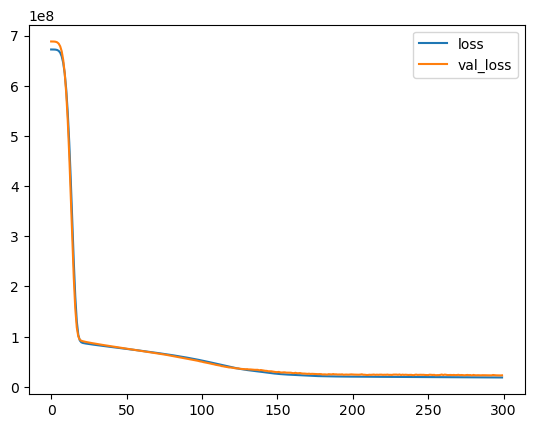

In [63]:
lossValue = pd.DataFrame(model.history.history)
lossValue.plot()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
guessArray = model.predict(x_test)

mean_absolute_error(y_test, guessArray)

122/122 [==============================] - 0s 823us/step


3392.872553378275

Yani fiyat ortalamasından yaklaşık 3000 pound sapabilir.

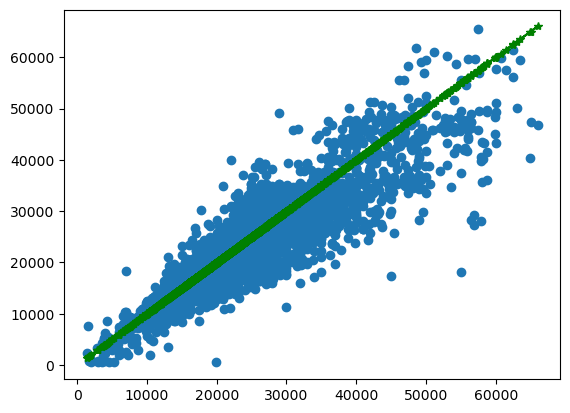

In [66]:
plt.scatter(y_test, guessArray)
plt.plot(y_test, y_test, "g-*")

# Modelden Tahmin Yapma

In [67]:
newCarValue = dataFrame.drop("price",axis=1).iloc[2]

In [68]:
#Modele sokmadan önce scale ediyoruz.
newCarValue = scaler.transform(newCarValue.values.reshape(-1,5))

In [35]:
model.predict(newCarValue)

1/1 [==============================] - 0s 17ms/step


array([[61426.42]], dtype=float32)

# Modeli kaydetme

In [69]:
model.save("car_model.h5")